In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras

import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/test.csv")

In [3]:
test_input = test[["value_amoni","value_water","value","mes","dia","hora","minuts"]].to_numpy()
test_label = test[["is_drift","dangerous_drift"]].to_numpy()

In [4]:
train_input = train[["value_amoni","value_water","value","mes","dia","hora","minuts"]].to_numpy()
train_label = train[["is_drift","dangerous_drift"]].to_numpy()

In [11]:
'''MODEL= 0.546 --> model = keras.Sequential([
    keras.layers.Dense(20,input_shape =(7,)),  # input layer (1)
    keras.layers.Dense(10, activation='sigmoid'),
    keras.layers.Dense(5, activation='sigmoid'), 
    keras.layers.Dense(3, activation='sigmoid'), # hidden layer (2)
    keras.layers.Dense(2, activation='sigmoid') # output layer (3)
])'''
model = keras.Sequential([
    keras.layers.Dense(7,input_shape =(7,)),  # input layer (1)
    keras.layers.Dense(14, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid'), 
    keras.layers.Dense(6, activation='sigmoid'), # hidden layer (2)
    keras.layers.Dense(2, activation='sigmoid') # output layer (3)
])

In [12]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
        

In [13]:
history = model.fit(train_input, train_label, epochs=250,validation_data=(test_input,test_label)) 

Epoch 1/250
145/145 [==============================] - 1s 5ms/step - loss: 0.2605 - accuracy: 1.0000 - val_loss: 0.2465 - val_accuracy: 1.0000
Epoch 2/250
145/145 [==============================] - 1s 4ms/step - loss: 0.2425 - accuracy: 1.0000 - val_loss: 0.2382 - val_accuracy: 1.0000
Epoch 3/250
145/145 [==============================] - 1s 3ms/step - loss: 0.2272 - accuracy: 0.8624 - val_loss: 0.2024 - val_accuracy: 0.5741
Epoch 4/250
145/145 [==============================] - 0s 3ms/step - loss: 0.1463 - accuracy: 0.5922 - val_loss: 0.0913 - val_accuracy: 0.5810
Epoch 5/250
145/145 [==============================] - 0s 3ms/step - loss: 0.0605 - accuracy: 0.5797 - val_loss: 0.0381 - val_accuracy: 0.5810
Epoch 6/250
145/145 [==============================] - 1s 4ms/step - loss: 0.0281 - accuracy: 0.5797 - val_loss: 0.0203 - val_accuracy: 0.5810
Epoch 7/250
145/145 [==============================] - 1s 4ms/step - loss: 0.0162 - accuracy: 0.5797 - val_loss: 0.0128 - val_accuracy: 0.5810

KeyboardInterrupt: 

In [8]:
model.evaluate(test_input,test_label)

37/37 [==============================] - 0s 2ms/step - loss: 5.2367e-09 - accuracy: 0.5810


[5.236745259651343e-09, 0.5810344815254211]

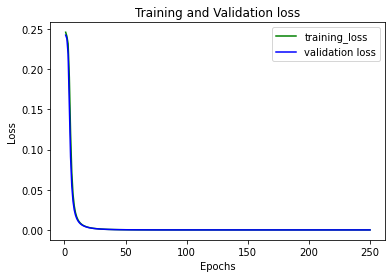

In [9]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,251)
plt.plot(epochs, loss_train, 'g', label='training_loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()